# 🎓 **Taller 4.6.1: Taller de Métodos de Clustering Basados en Densidad**


## OBJETIVOS DEL TALLER:
En esta práctica vamos a ver cómo funcionan los algoritmos de clustering basado en Densidad los cuales agrupan puntos de datos basándose en regiones de alta densidad de puntos, separadas por regiones de baja densidad.

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it
from matplotlib.cm import get_cmap
from scipy.cluster.hierarchy import dendrogram

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [2]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

def cargar_dataset_csv(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_csv(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


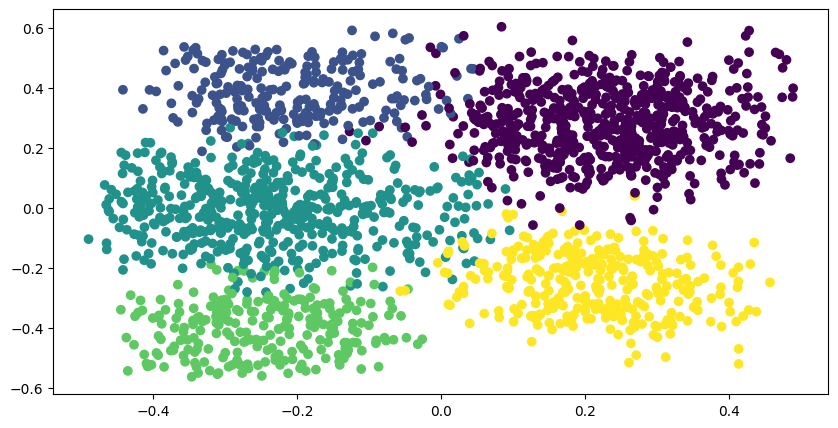

In [ ]:
# Cargar dataset
D =cargar_dataset("dataset_inseparable.xlsx")

D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,1:3]
Dy = D[:,3]

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0], Dx[:,1], c = Dy)

# 🎯 **1:Cree el Algoritmo de Clustering DBSCAN**

## Calcular el Vecindario
Uno de los pasos clave del algoritmo DBSCAN es el descubrimiento del vecindario (de un ejemplo $x_i$). Para ello sólo se precisa de la matriz de distancias y el parámetro $\epsilon$ que marca un umbral en la distancia máxima entre dos puntos que define el vecindario:

In [3]:
def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

In [5]:
def encuentra_vecindario(mDistancia, i, eps):
    vecinos = np.where(mDistancia[i] <= eps)[0]
    vecinos = vecinos[vecinos != i]
    return vecinos


## Crear el algoritmo DBSCAN

In [7]:
def expandir_cluster(mDistancia, labels, vecindario, C, eps, M):
    it = 0
    while it < vecindario.size:
        j = vecindario[it]
        if labels[j] == -1:
            labels[j] = C
        elif labels[j] == 0:
            labels[j] = C
            vecindario_j = encuentra_vecindario(mDistancia, j, eps)
            if vecindario_j.size >= M:
                vecindario = np.unique(
                    np.concatenate((vecindario, vecindario_j))
                )
        it += 1


In [8]:
def agrupamiento_densidad_DBSCAN(mDistancia, eps, M):
    labels = np.zeros(mDistancia.shape[0])
    C = 0
    for i in np.arange(mDistancia.shape[0]):
        if labels[i] != 0:
            continue
        vecindario = encuentra_vecindario(mDistancia, i, eps)
        if len(vecindario) < M:
            labels[i] = -1
        else:
            C += 1
            labels[i] = C
            expandir_cluster(mDistancia, labels, vecindario, C, eps, M)
    return labels


## Ahora ya estamos en disposición de realizar el DBSCAN.


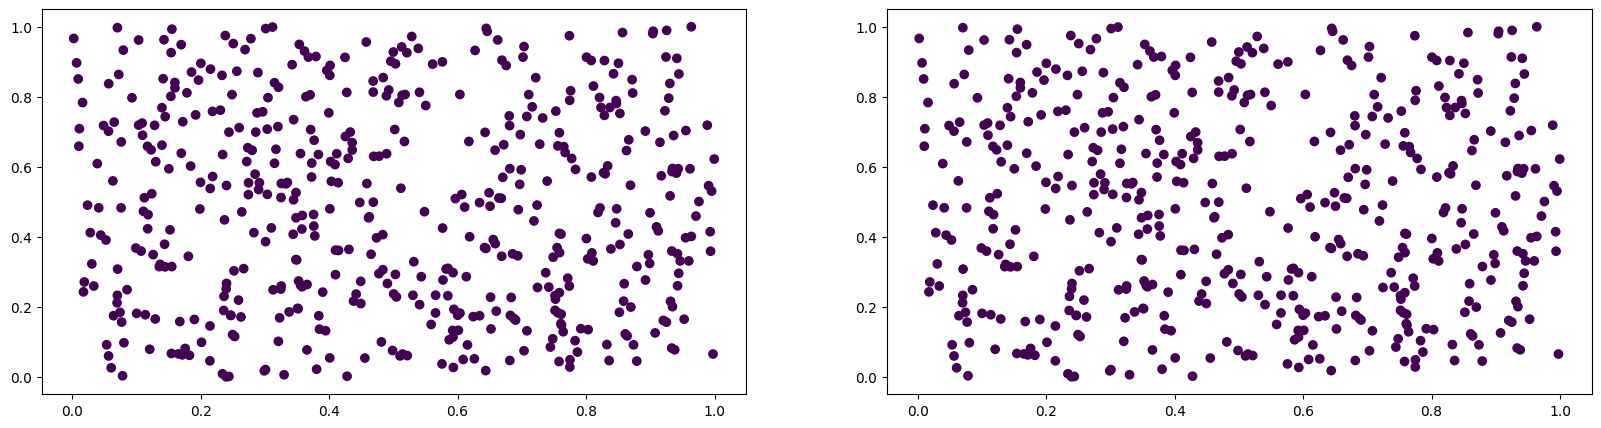

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Datos de ejemplo
Dx = np.random.rand(500, 2)
Dy = np.zeros(500)

eps = 0.07
M = 70

mDistancia = cdist(Dx, Dx)

Dyp = agrupamiento_densidad_DBSCAN(mDistancia, eps, M)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(Dx[:, 0], Dx[:, 1], c=Dy)
ax[1].scatter(Dx[:, 0], Dx[:, 1], c=Dyp)
plt.show()


<hr>
Podemos jugar con diferentes valores de $\epsilon$ y $M$ para ver su efecto sobre diferentes conjuntos de datos:


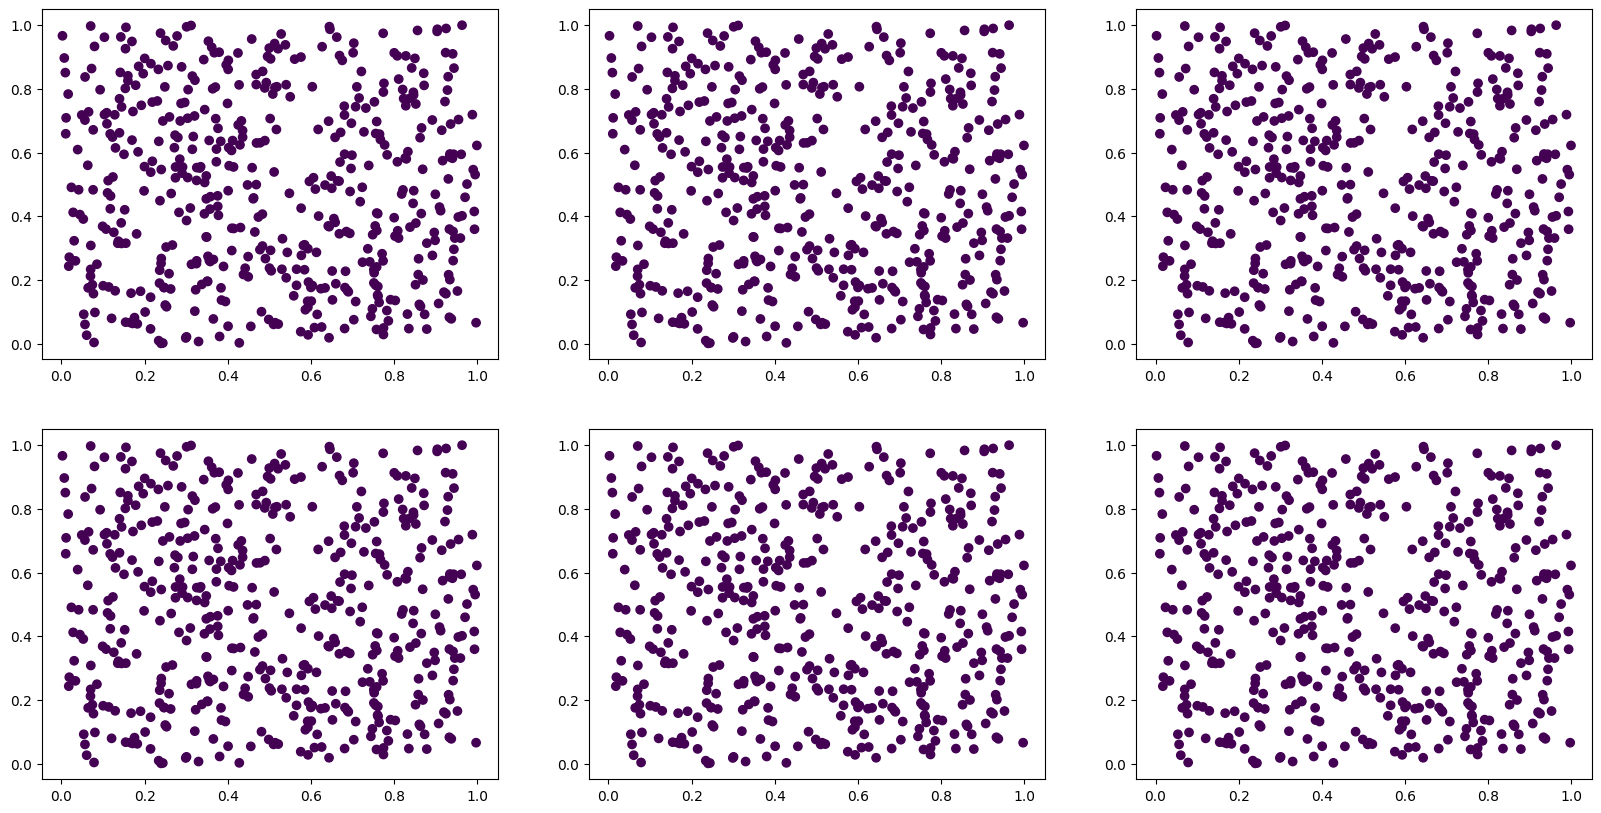

In [11]:
Dyp1 = agrupamiento_densidad_DBSCAN(mDistancia,eps=.03,M=38)
Dyp2 = agrupamiento_densidad_DBSCAN(mDistancia,eps=.07,M=38)
Dyp3 = agrupamiento_densidad_DBSCAN(mDistancia,eps=.05,M=25)
Dyp4 = agrupamiento_densidad_DBSCAN(mDistancia,eps=.03,M=48)
Dyp5 = agrupamiento_densidad_DBSCAN(mDistancia,eps=.06,M=18)

fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].scatter(Dx[:,0], Dx[:,1], c = Dy)
ax[0,1].scatter(Dx[:,0], Dx[:,1], c = Dyp1)
ax[0,2].scatter(Dx[:,0], Dx[:,1], c = Dyp2)
ax[1,0].scatter(Dx[:,0], Dx[:,1], c = Dyp3)
ax[1,1].scatter(Dx[:,0], Dx[:,1], c = Dyp4)
ax[1,2].scatter(Dx[:,0], Dx[:,1], c = Dyp5)

✅ Dataset cargado desde URL GitHub


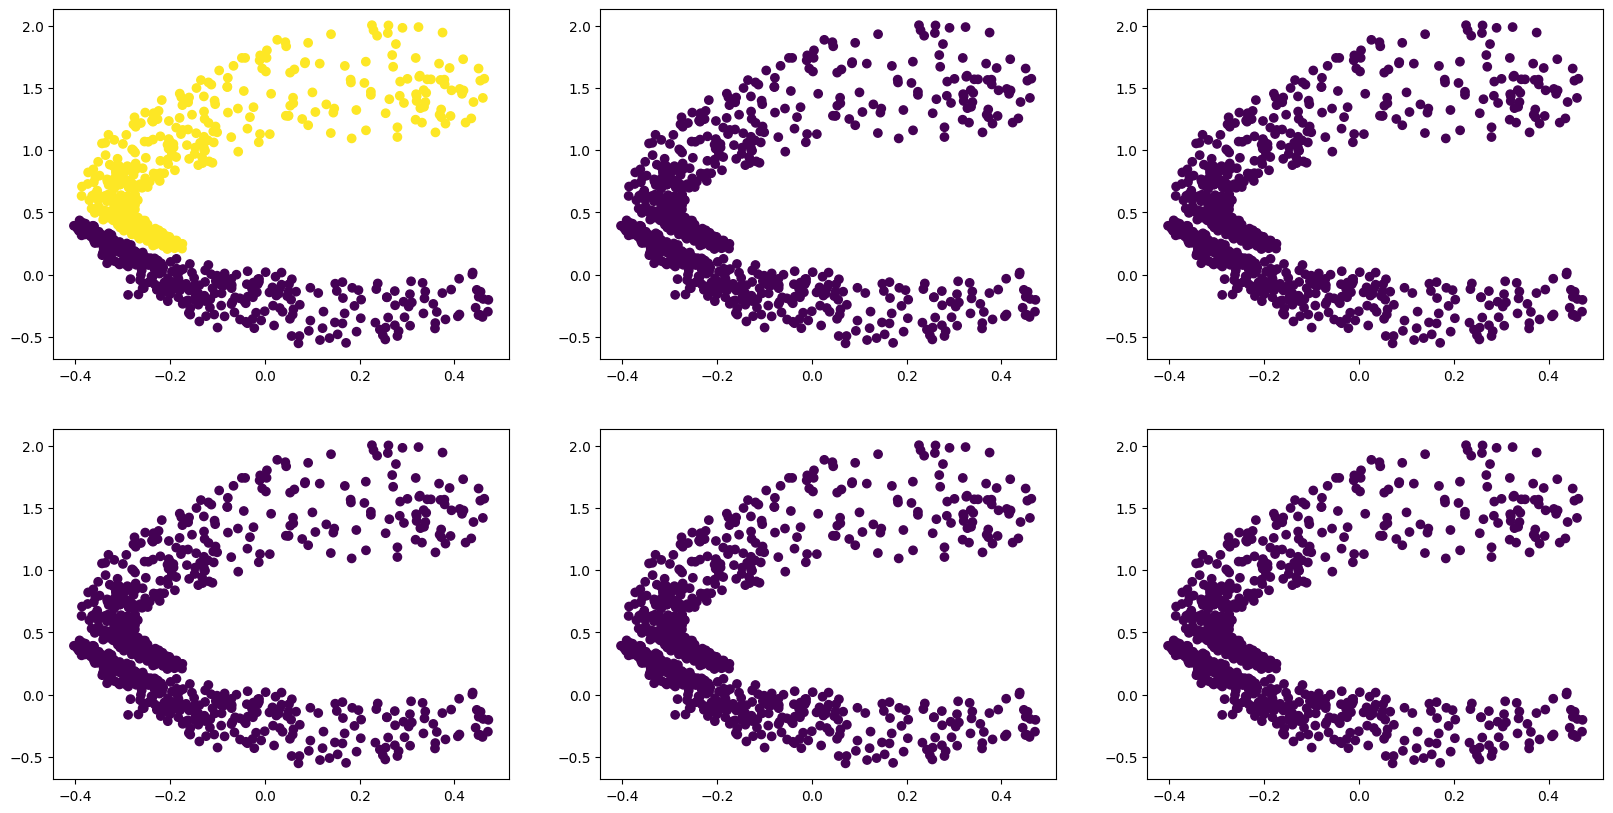

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

D = cargar_dataset("dataset_dos_remolinos.xlsx")
D = D[np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False), :]

Dx = D[:, 1:3]
Dy = D[:, 3]

mDistancia = cdist(Dx, Dx)

Dyp1 = agrupamiento_densidad_DBSCAN(mDistancia, eps=0.05, M=50)
Dyp2 = agrupamiento_densidad_DBSCAN(mDistancia, eps=0.06, M=60)
Dyp3 = agrupamiento_densidad_DBSCAN(mDistancia, eps=0.07, M=70)
Dyp4 = agrupamiento_densidad_DBSCAN(mDistancia, eps=0.08, M=80)
Dyp5 = agrupamiento_densidad_DBSCAN(mDistancia, eps=0.09, M=90)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0, 0].scatter(Dx[:, 0], Dx[:, 1], c=Dy)
ax[0, 1].scatter(Dx[:, 0], Dx[:, 1], c=Dyp1)
ax[0, 2].scatter(Dx[:, 0], Dx[:, 1], c=Dyp2)
ax[1, 0].scatter(Dx[:, 0], Dx[:, 1], c=Dyp3)
ax[1, 1].scatter(Dx[:, 0], Dx[:, 1], c=Dyp4)
ax[1, 2].scatter(Dx[:, 0], Dx[:, 1], c=Dyp5)

plt.show()


✅ Dataset cargado desde URL GitHub


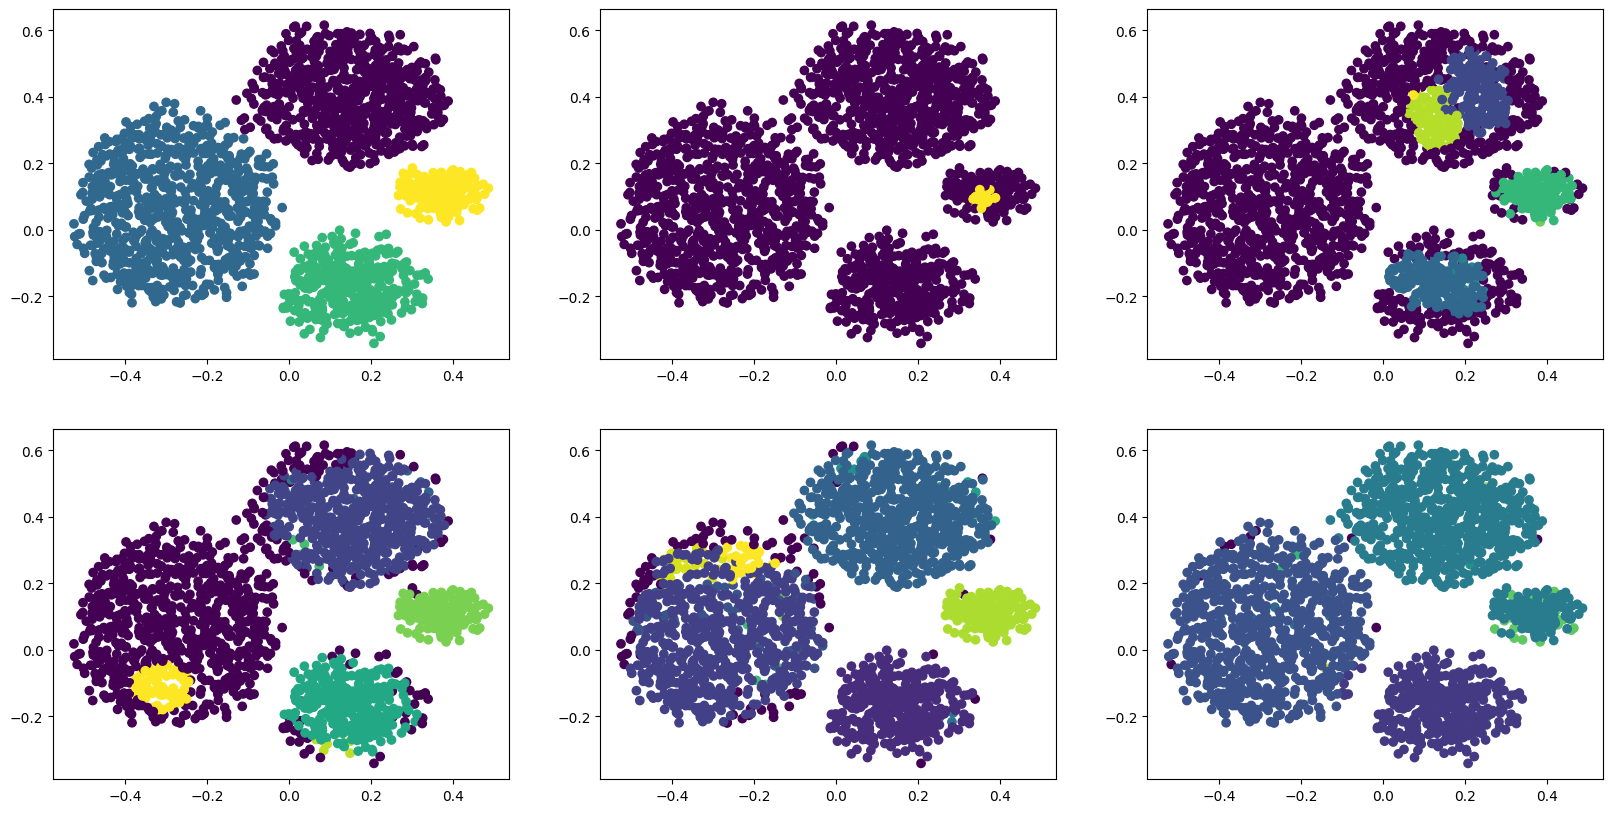

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

D = cargar_dataset("dataset_cuatro_diferente_medida.xlsx")
D = D[np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False), :]

Dx = D[:, 1:3]
Dy = D[:, 3]

mDistancia = cdist(Dx, Dx)

Dyp1 = agrupamiento_densidad_DBSCAN(mDistancia, eps=0.03, M=30)
Dyp2 = agrupamiento_densidad_DBSCAN(mDistancia, eps=0.05, M=50)
Dyp3 = agrupamiento_densidad_DBSCAN(mDistancia, eps=0.07, M=70)
Dyp4 = agrupamiento_densidad_DBSCAN(mDistancia, eps=0.09, M=90)
Dyp5 = agrupamiento_densidad_DBSCAN(mDistancia, eps=0.12, M=120)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0, 0].scatter(Dx[:, 0], Dx[:, 1], c=Dy)
ax[0, 1].scatter(Dx[:, 0], Dx[:, 1], c=Dyp1)
ax[0, 2].scatter(Dx[:, 0], Dx[:, 1], c=Dyp2)
ax[1, 0].scatter(Dx[:, 0], Dx[:, 1], c=Dyp3)
ax[1, 1].scatter(Dx[:, 0], Dx[:, 1], c=Dyp4)
ax[1, 2].scatter(Dx[:, 0], Dx[:, 1], c=Dyp5)

plt.show()


<hr>
<h2>Implementaciones en librerías de Python</h2>

Scikit-learn (scikit-learn) es la implementación más popular y ampliamente utilizada:

In [14]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(Dx)

print(f"\n📊 Información del dataset:")
print(f"   • Número total de puntos: {len(Dx)}")
print(f"   • Dimensionalidad: {Dx.shape[1]}")
print(f"   • Rango de valores: [{Dx.min():.2f}, {Dx.max():.2f}]")


📊 Información del dataset:
   • Número total de puntos: 1999
   • Dimensionalidad: 2
   • Rango de valores: [-0.53, 0.62]


In [15]:
from sklearn.cluster import DBSCAN
eps = 0.07      # Distancia máxima entre puntos del mismo cluster
min_samples = 38  # Mínimo de puntos para formar un cluster

# Crear y entrenar el modelo
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
clusters = dbscan.fit_predict(Dx)

print("\n📈 RESULTADOS DEL CLUSTERING:")

# Número de clusters (excluyendo el ruido etiquetado como -1)
unique_clusters = np.unique(clusters)
n_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)
n_noise = np.sum(clusters == -1)

print(f"   • Número de clusters encontrados: {n_clusters}")
print(f"   • Puntos clasificados como ruido: {n_noise} ({n_noise/len(clusters)*100:.1f}%)")
print(f"   • Parámetros usados: eps={eps}, min_samples={min_samples}")



📈 RESULTADOS DEL CLUSTERING:
   • Número de clusters encontrados: 4
   • Puntos clasificados como ruido: 2 (0.1%)
   • Parámetros usados: eps=0.07, min_samples=38


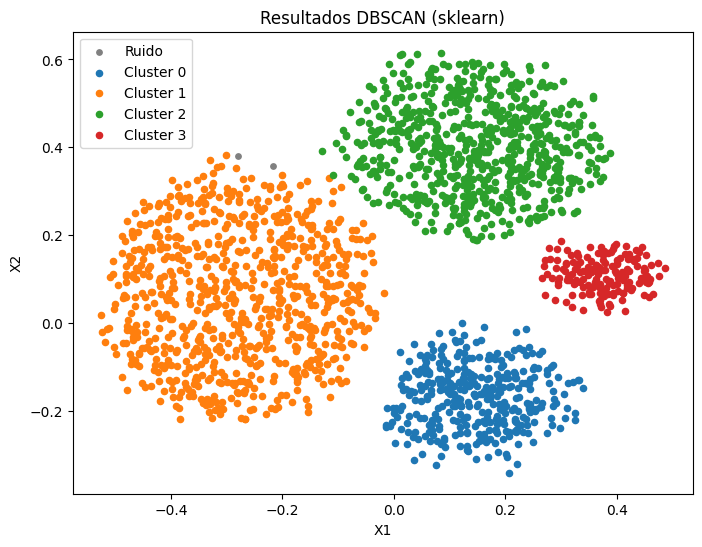

In [16]:
# GRAFICAR LOS GRUPOS

plt.figure(figsize=(8, 6))

# Ruido (-1)
ruido = clusters == -1
plt.scatter(Dx[ruido, 0], Dx[ruido, 1], c='gray', s=15, label='Ruido')

# Clusters
for c in np.unique(clusters):
    if c == -1:
        continue
    pts = clusters == c
    plt.scatter(Dx[pts, 0], Dx[pts, 1], s=20, label=f'Cluster {c}')

plt.title("Resultados DBSCAN (sklearn)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


# 🚀 ¡TALLER FINALIZADO!"